In [ ]:
#Final Project - Krystina Moses, DSC530

In [70]:
import pandas as pd
import numpy as np
import matplotlib
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
nsdf = pd.read_csv('NamesStates.csv', delimiter = ',') #namesstates dataframe (nsdf)

In [3]:
nsdf.columns #display columns(variables)

Index(['State', 'Sex', 'BirthYear', 'Name', 'Occurrences'], dtype='object')

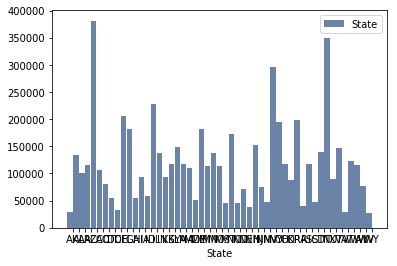

In [4]:
#Histogram of the State variable
hist1 = thinkstats2.Hist(nsdf.State, label='State')
thinkplot.Hist(hist1)
thinkplot.Config(xlabel='State')

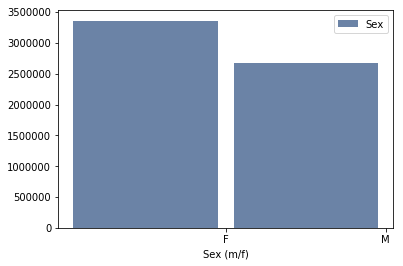

In [5]:
#Histogram of the Sex variable
hist2 = thinkstats2.Hist(nsdf.Sex, label='Sex')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='Sex (m/f)')

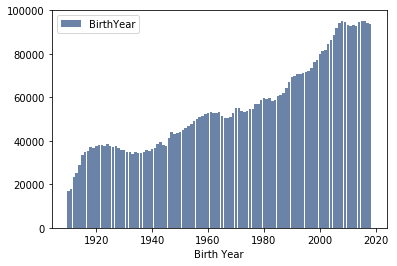

In [6]:
#Histogram of the BirthYear variable
hist3 = thinkstats2.Hist(nsdf.BirthYear, label='BirthYear')
thinkplot.Hist(hist3)
thinkplot.Config(xlabel='Birth Year')

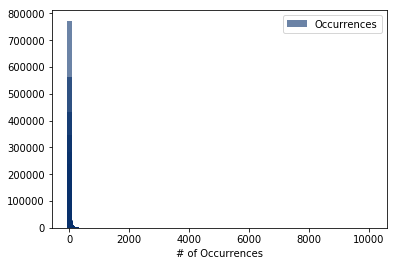

In [7]:
#Histogram of the Occurences variable
hist4 = thinkstats2.Hist(nsdf.Occurrences, label='Occurrences')
thinkplot.Hist(hist4, width = 150)
thinkplot.Config(xlabel='# of Occurrences')

In [ ]:
#No known outliers showing for the variables. 

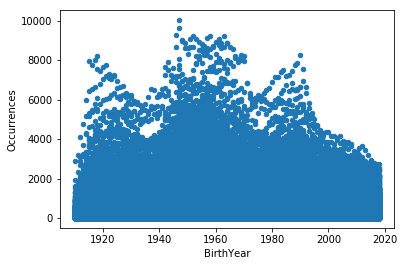

In [8]:
nsdf.plot(kind="scatter", x='BirthYear', y='Occurrences') #use Scatterplot to determine any outliers.

In [9]:
#mean of Occurences variable
nsdf.Occurrences.mean()

51.617023196665116

In [10]:
#variance of Occurences variable
nsdf.Occurrences.var()

31097.659254756494

In [11]:
#standard deviation of Occurences variable
nsdf.Occurrences.std()

176.34528418632718

In [12]:
#mean of BirthYear variable
nsdf.BirthYear.mean()

1975.172432309675

In [13]:
#variance of BirthYear variable
nsdf.BirthYear.var()

934.2906887794825

In [14]:
#standard deviation of BirthYear variable
nsdf.BirthYear.std()

30.566169023603244

In [15]:
nsdf.describe() #descriptive characteristics of the data for BirthYear and Occurences

,BirthYear,Occurrences
count,6.028151e+06,6.028151e+06
mean,1.975172e+03,5.161702e+01
std,3.056617e+01,1.763453e+02
min,1.910000e+03,5.000000e+00
25%,1.952000e+03,7.000000e+00
50%,1.980000e+03,1.300000e+01
75%,2.002000e+03,3.300000e+01
max,2.018000e+03,1.002100e+04


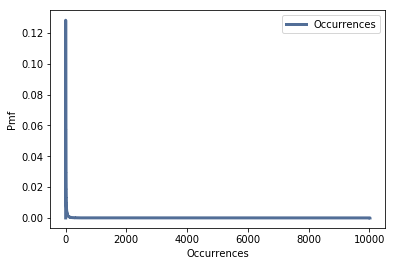

In [16]:
Opmf = thinkstats2.Pmf(nsdf.Occurrences, label='Occurrences')
thinkplot.Pmf(Opmf)
thinkplot.Config(xlabel='Occurrences', ylabel='Pmf')

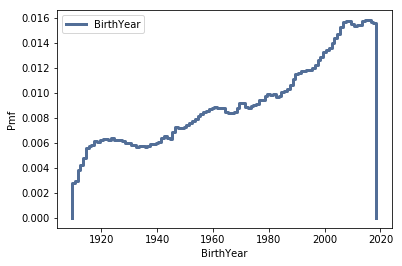

In [17]:
BYpmf = thinkstats2.Pmf(nsdf.BirthYear, label='BirthYear')
thinkplot.Pmf(BYpmf)
thinkplot.Config(xlabel='BirthYear', ylabel='Pmf')

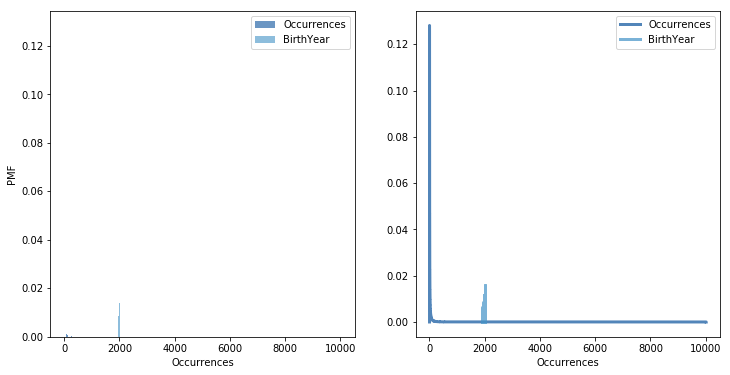

In [18]:
#Compare two scenerios using a PMF

O_pmf = thinkstats2.Pmf(nsdf.Occurrences, label='Occurrences')
BY_pmf = thinkstats2.Pmf(nsdf.BirthYear, label='BirthYear')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(O_pmf, align='right', width=.5)
thinkplot.Hist(BY_pmf, align='left', width=.5)
thinkplot.Config(xlabel='Occurrences', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([O_pmf, BY_pmf])
thinkplot.Config(xlabel='Occurrences')

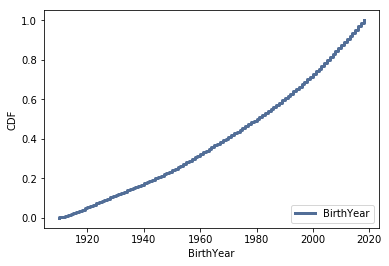

In [19]:
#Create 1 CDF

BY_cdf = thinkstats2.Cdf(nsdf.BirthYear, label='BirthYear')
thinkplot.Cdf(BY_cdf)
thinkplot.Config(xlabel='BirthYear', ylabel='CDF', loc='lower right')

In [20]:
BY = nsdf.BirthYear
thinkstats2.Cdf(BY, label='BirthYear CDF')

#CDF range from .002 - 0.98 over the years. The earlier years are in the .02 percentile 
    #and the later years are closer to the 98 percentile.

Cdf([1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923
 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937
 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018], [0.00279173 0.00571485 0.00955998 0.01375297 0.01853421 0.0241132
 0.02987384 0.03574297 0.04188067 0.04793858 0.05418892 0.06053017
 0.06681966 0.07307465 0.07944459 0.08568266 0.09187228 0.09808497
 0.1041948  0.11015019 0.11612334 0.12191383 0.12773187 0.13339298
 0.13914034 0.14488058 0.15057917 0.15636221 0.1622826  0.16815538
 0.1741534  0.18023702 0.18665956 0.19318975 0.1995456  0.20582132
 0.21267533 0.21996728 0.22713117 0.2343

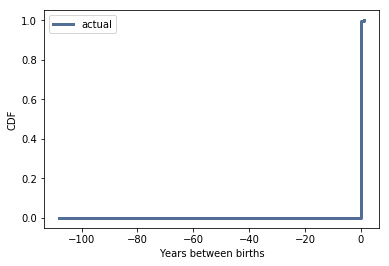

In [21]:
#Analytical Distribution

diffs = nsdf.BirthYear.diff() #difference between consectutive years
cdf = thinkstats2.Cdf(diffs, label='actual') #distribution of intervals

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Years between births', ylabel='CDF', loc='upper left')
                 
                 #This is not an exponential distribution.

Mean, Var 38.61977889795651 5690.7288301825265
Sigma 75.43691954330139


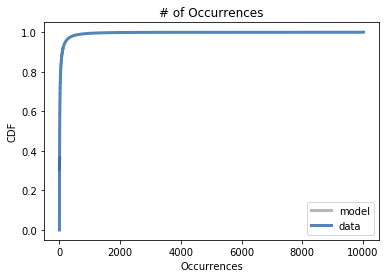

In [22]:
#Normal distribution
mu, var = thinkstats2.TrimmedMeanVar(nsdf.Occurrences, p=0.01)
print('Mean, Var', mu, var)
    
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

cdf = thinkstats2.Cdf(nsdf.Occurrences, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='# of Occurrences',
                 xlabel='Occurrences',
                 ylabel='CDF',
                 loc='lower right')

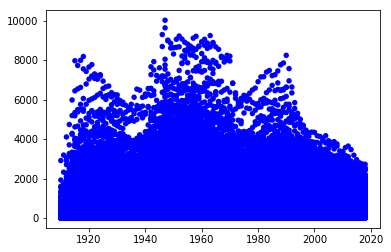

In [23]:
#create 2 scatterplots comparing two variables
thinkplot.Scatter(nsdf.BirthYear, nsdf.Occurrences, alpha=1.0) #plot 1, x = Birth Year, y = occurences

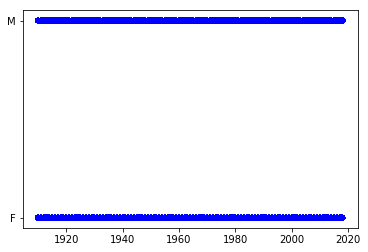

In [24]:
thinkplot.Scatter(nsdf.BirthYear, nsdf.Sex, alpha=1.0) #plot 2

In [25]:
#Filter out older years to have a smaller dataframe
nsdf2 = nsdf[nsdf['BirthYear'] >= 2017]
nsdf2.head() #View first 5 rows

,State,Sex,BirthYear,Name,Occurrences
14209,AK,F,2017,Emma,57
14210,AK,F,2017,Olivia,56
14211,AK,F,2017,Aurora,40
14212,AK,F,2017,Isabella,39
14213,AK,F,2017,Sophia,35


In [26]:
nsdf2.tail() #view the last 5 rows

,State,Sex,BirthYear,Name,Occurrences
6028146,WY,M,2018,Peyton,5
6028147,WY,M,2018,Richard,5
6028148,WY,M,2018,Titus,5
6028149,WY,M,2018,Tristan,5
6028150,WY,M,2018,Zander,5


In [29]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov 

#Covariance functions from exercises

In [31]:
Cov(nsdf2.BirthYear, nsdf2.Occurrences) #Covariance

-0.13194845015689743

In [32]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr 

#Correlation function from exercises

In [33]:
Corr(nsdf2.BirthYear, nsdf2.Occurrences) #Correlation

-0.003288933645179017

In [34]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [35]:
SpearmanCorr(nsdf2.BirthYear, nsdf2.Occurrences) #Spearman's correlation

0.00013126019473088022

In [36]:
Corr(nsdf2.BirthYear, np.log(nsdf2.Occurrences)) #Pearson's correlation with transformed variable Occurrences.

-0.00108854021753853

In [ ]:
#Pearson's = -.001, Spearman's = 0.0001. 

In [57]:
#change strings to integers 
nsdf2.Sex[nsdf2.Sex == 'M'] = 1
nsdf2.Sex[nsdf2.Sex == 'F'] = 2
print(nsdf2)

C:\Users\xomos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\xomos\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


        State  Sex  BirthYear         Name  Occurrences
14209      AK    2       2017         Emma           57
14210      AK    2       2017       Olivia           56
14211      AK    2       2017       Aurora           40
14212      AK    2       2017     Isabella           39
14213      AK    2       2017       Sophia           35
14214      AK    2       2017       Evelyn           34
14215      AK    2       2017       Amelia           33
14216      AK    2       2017          Ava           33
14217      AK    2       2017      Abigail           31
14218      AK    2       2017    Charlotte           28
14219      AK    2       2017       Harper           28
14220      AK    2       2017      Adeline           26
14221      AK    2       2017    Elizabeth           23
14222      AK    2       2017      Eleanor           22
14223      AK    2       2017        Emily           22
14224      AK    2       2017          Mia           22
14225      AK    2       2017         Nora      

In [61]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [68]:
def RunTests(nsdf2, iters=1000):

    n = len(nsdf2)
    male = nsdf2[nsdf2.Sex == 1]
    female = nsdf2[nsdf2.Sex != 2]

    # compare Occurrences
    data = male.Occurrences.values, female.Occurrences.values
    ht = DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)

    # test correlation
    nsdf3 = nsdf2.dropna(subset=['Sex', 'Occurrences'])
    data2 = nsdf3.Sex.values, nsdf3.Occurrences.values
    ht = CorrelationPermute(data)
    p2 = ht.PValue(iters=iters)

    print((n, p1, p2))

In [69]:
n = len(nsdf2)
for _ in range(7):
    sample = thinkstats2.SampleRows(nsdf2, n)
    RunTests(sample)
    n //= 2

(188016, 1.0, 0.0)
(94008, 1.0, 0.0)
(47004, 1.0, 0.0)
(23502, 1.0, 0.0)
(11751, 1.0, 0.0)
(5875, 1.0, 0.0)
(2937, 1.0, 0.0)


In [ ]:
#test for occurrence differences
#test of correlation of the gender and Occurrences

#for all sample sizes, the tests came back the same. This tells me that for this comparison is that there is
    #no relationship between the variables.

In [71]:
formula = 'nsdf2.BirthYear ~ nsdf2.Occurrences'
model = smf.ols(formula, data=nsdf2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        nsdf2.BirthYear   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.034
Date:                Sat, 10 Aug 2019   Prob (F-statistic):              0.154
Time:                        12:46:32   Log-Likelihood:            -1.3646e+05
No. Observations:              188016   AIC:                         2.729e+05
Df Residuals:                  188014   BIC:                         2.729e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2017.4990      0.001   1.63e+06      0.000    2017.497    2017.501
nsdf2.Occurrences -2.049e-05   1.44e-05     -1.426      0.154   -4.87e-05    7.67e-06
==============================================================================
Omnibus:                   640545.310   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31334.646
Skew:                           0.007   Prob(JB):                         0.00
Kurtosis:                       1.000   Cond. No.                         92.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
intercept, slope = thinkstats2.LeastSquares(nsdf2.BirthYear, nsdf2.Occurrences)
intercept, slope

(1096.4212338516495, -0.527799689047936)

In [76]:
cd = thinkstats2.CoefDetermination(nsdf2.BirthYear, nsdf2.Occurrences)
cd
#coefficient of determination

-25752.01239280087

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000169024B59B0>,
      dtype=object)

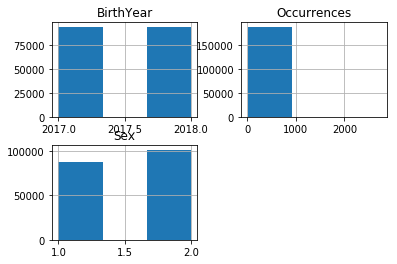

In [77]:
nsdf2.hist(bins=3) #Histogram of BirthYear and Occurrences (Numerical variables)

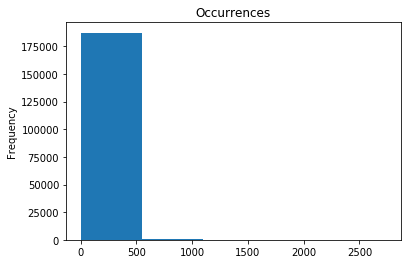

In [81]:
nsdf2['Occurrences'].plot(kind="hist", bins=5, title='Occurrences') #Histogram for # of Occurrences of name

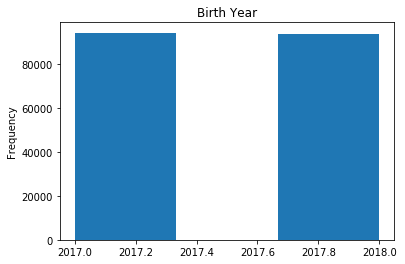

In [80]:
nsdf2['BirthYear'].plot(kind="hist", bins=3, title='Birth Year') #Histogram for Birth Years

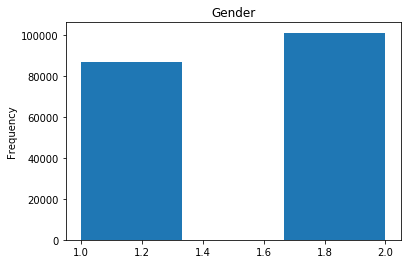

In [82]:
nsdf2['Sex'].plot(kind="hist", bins=3, title='Gender') #Histogram for Gender (1 = male, 2 = female)